In [1]:
import numpy as np
import veloxchem as vlx

# for vlx
silent_ostream = vlx.OutputStream(None)
from mpi4py import MPI

comm = MPI.COMM_WORLD
# au to eV conversion factor
au2ev = 27.211386

water_mol_str = """
O       0.0000000000     0.0000000000     0.1178336003
H      -0.7595754146    -0.0000000000    -0.4713344012
H       0.7595754146     0.0000000000    -0.4713344012
"""

# Create veloxchem mol and basis objects
mol_vlx = vlx.Molecule.read_molecule_string(water_mol_str)
bas_vlx = vlx.MolecularBasis.read(mol_vlx, "6-31G")

# Perform SCF calculation
scf_gs = vlx.ScfRestrictedDriver(comm, ostream=silent_ostream)
scf_results = scf_gs.compute(mol_vlx, bas_vlx)

# Extract orbital energies
orbital_energies = scf_results["E_alpha"]

In [2]:
print("1s E from Koopmans' theorem:", np.around(au2ev * orbital_energies[0], 2), "eV")

1s E from Koopmans' theorem: -559.5 eV


In [3]:
import gator
import matplotlib.pyplot as plt

water_mol_str = """
O       0.0000000000     0.0000000000     0.1178336003
H      -0.7595754146    -0.0000000000    -0.4713344012
H       0.7595754146     0.0000000000    -0.4713344012
"""

# Construct structure and basis objects
struct = gator.get_molecule(water_mol_str)
basis = gator.get_molecular_basis(struct, "6-31G")

# Perform SCF calculation
scf_gs = gator.run_scf(struct, basis)

# Calculate the 6 lowest eigenstates with CVS restriction to MO #1 (oxygen 1s)
adc_res = gator.run_adc(
    struct, basis, scf_gs, method="cvs-adc2x", singlets=4, core_orbitals=1
)

* Info * Reading basis set from file: /Users/golo.dusanka/miniconda3/envs/echem/lib/python3.12/site-packages/veloxchem/basis/6-31G
                                                                                                                          
                                              Molecular Basis (Atomic Basis)                                              
                                                                                                                          
                               Basis: 6-31G                                                                               
                                                                                                                          
                               Atom Contracted GTOs           Primitive GTOs                                              
                                                                                                                          
        

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.983870205310 a.u. Time: 0.03 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -75.983870373952    0.0000000000      0.00006826      0.00001638      0.00000000                


                  2       -75.983870375702   -0.0000000017      0.00002636      0.00000475      0.00006304                


                  3       -75.983870375765   -0.0000000001      0.00000396      0.00000061      0.00000524                


                  4       -75.983870375769   -0.0000000000      0.00000029      0.00000008      0.00000296                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.04 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -75.9838703758 a.u.                                              
               Electronic Energy                  :      -85.1400150952 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000002874 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -1.036166 a.u.        -2.633670 Debye                                     
                                 Total :         1.036166 a.u.         2.633670 Debye                                     
                

SCF converged in 4 iterations.
Total Energy: -75.9838703758 au


/Users/golo.dusanka/miniconda3/envs/echem/lib/python3.12/site-packages/adcc/misc.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


Starting cvs-adc2x singlet Jacobi-Davidson ...
Niter n_ss  max_residual  time  Ritz values
  1     8        1.2621  143ms  [20.27035896 20.30081829 20.86977777 20.91121528]


  2    16      0.038976  241ms  [19.72495586 19.80691963 20.50881    20.51569984]


  3    24     0.0035541  286ms  [19.71673642 19.79707758 20.49577433 20.5050343 ]


  4    32    0.00029894  335ms  [19.71639059 19.79671156 20.49373717 20.50484016]


  5    40    3.1991e-05  375ms  [19.7163757  19.79669977 20.49353402 20.5048266 ]
=== Restart ===


  6    16    5.9779e-06  334ms  [19.7163752  19.79669907 20.49351316 20.50482466]


  7    24    1.1003e-06  284ms  [19.71637516 19.79669898 20.49350798 20.50482383]


  8    32    5.7208e-07  328ms  [19.71637516 19.79669897 20.49350754 20.50482373]
=== Converged ===
    Number of matrix applies:    64
    Total solver time:             2s 355ms


+--------------------------------------------------------------+
| cvs-adc2x                               singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0      19.71638      536.5099   0.0178       0.8       0.2  |
|  1       19.7967      538.6956   0.0373    0.8087    0.1913  |
|  2      20.49351      557.6567   0.0099    0.7858    0.2142  |
|  3      20.50482      557.9647   0.1016    0.8441    0.1559  |
+--------------------------------------------------------------+



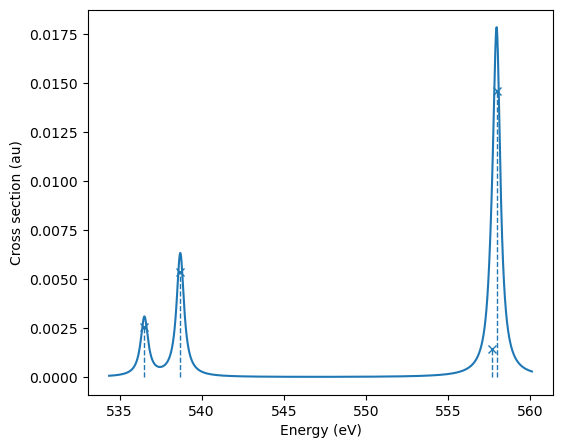

In [4]:
# Print information on eigenstates
print(adc_res.describe())

plt.figure(figsize=(6, 5))
# Convolute using functionalities available in gator and adcc
adc_res.plot_spectrum()
plt.show()